# *Лабораторная работа №1*

## Подготовка набора данных (Теоретическая часть)


При подготовке набора данных следует ориентироваться на поставленную задачу, так как в именно от данного этапа зависит то, будут ли необходимые нам данные в итоговом наборе данных или нет. Вся дальнейшая обработка будет проводиться с целью разработки механизма определения стоимости автомобиля в зависимости от его характеристик.

Датасетом (набором данных), с которым будет вестись работа в данном лабораторном практикуме, является база данных о подержанных автомобилях, проданных в Германии в 2016 году, с сайта Kaggle.com.                            
https://www.kaggle.com/orgesleka/used-cars-database/data

Библиотека warnings отвечает за то, какие предупреждения (warnings) о работе будут выводиться пользователю. FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях. Поэтому такие предупреждения мы будем игнорировать. Чтобы включить режим игнорирования мы отбираем все предупреждения из категории FutureWarning и выбираем для них действия 'ignore'. Это делается вызовом функции simplefilter c задание двух атрибутов: действия action и категории предупреждений category.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для работы с данными в python используется библиотека pandas. Подключим ее к проекту и для простоты обращения обозначим pd.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

Загрузим наш набор данных для дальнейшей работы. %%capture используется для отключения уведомлений о ходе загрузки.

In [3]:
%%capture
!wget https://www.dropbox.com/s/wlbij79v3u4q2jy/autos.csv

Сохраним загруженный набор данных в виде dataframe - основной единицы при работе с библиотекой pandas. Такую возможность нам предоставляет команда read_csv, которая в качестве аргумента требует имя файла. Второй аргумент нам потребовалось использовать, так как наша база родом из Германии и содержит недоступные в базовой системе кодировки символы.

In [4]:
df = pd.read_csv('autos.csv', encoding='iso-8859-1')

*Примечание*: В рамках нашего курса мы ограничены достаточно скромным, по меркам больших данных, объемом файла. При работе с актуальными большими данными Вы можете столкнуться с тем, что файл полностью не может расположиться в оперативной памяти. В этом случае следует действовать по принципу «Разделяй и властвуй», то есть разбить базу данных на несколько файлов меньшего объема и обрабатывать их независимо.

После выгрузки базы данных в память доступ к ней осуществляется через имя переменной. В частности, в рамках данной среды, при вводе имени осуществляется вывод на экран первых и последних строк базы и ее общий размер, в данном случае 371528 строк из 20-ти столбцов.

In [5]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


В качестве альтернативы можно использовать следующие команды:

In [6]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

Теперь можно переходить непосредственно к анализу наших данных. Первым шагом в этом процессе должно стать определение количества уникальных значений в каждом столбце. Для начала рассмотрим первый столбец. Команда unique() генерирует список всех уникальных значений.

In [8]:
df['dateCrawled'].unique()

array(['2016-03-24 11:52:17', '2016-03-24 10:58:45',
       '2016-03-14 12:52:21', ..., '2016-03-14 17:48:27',
       '2016-03-19 18:57:12', '2016-03-07 19:39:19'], dtype=object)

Так как нам необходимо количество различных значений, то берем длину полученного списка.

In [9]:
len(df['dateCrawled'].unique())

280500

Проводим данную операцию для всех столбцов нашей базы данных.

In [10]:
names = list(df)
for name in names:
    print(name, len(df[name].unique()))

dateCrawled 280500
name 233531
seller 2
offerType 2
price 5597
abtest 2
vehicleType 9
yearOfRegistration 155
gearbox 3
powerPS 794
model 252
kilometer 13
monthOfRegistration 13
fuelType 8
brand 40
notRepairedDamage 3
dateCreated 114
nrOfPictures 1
postalCode 8150
lastSeen 182806


Полученный результат достаточно сложно анализировать, поэтому следует выровнять вывод столбцов на экран.

In [11]:
names = list(df)
for name in names:
    print("%20s%7d" % (name, len(df[name].unique())))

         dateCrawled 280500
                name 233531
              seller      2
           offerType      2
               price   5597
              abtest      2
         vehicleType      9
  yearOfRegistration    155
             gearbox      3
             powerPS    794
               model    252
           kilometer     13
 monthOfRegistration     13
            fuelType      8
               brand     40
   notRepairedDamage      3
         dateCreated    114
        nrOfPictures      1
          postalCode   8150
            lastSeen 182806


Столбцы с высокой кардинальностью (большим количеством уникальных значений) не несут практической пользы в рамках нашей задачи.

*Примечание*: Данная оговорка важна, так как, помимо задачи расчета стоимости подержанного автомобиля, данная база может обрабатываться кем-то в рамках исследования глобальных экономических процессов, тогда важным станет столбец со временем создания объявления, что позволит делать выводы о текущей экономической ситуации в стране в зависимости от запрошенной владельцем стоимости в конкретный момент времени, или столбец с почтовыми индексами, для анализа зависимости цен от географического расположения участника сделки.

Исходя из специфики нашего исследования, мы можем смело избавиться от столбцов с датой, датой последнего просмотра объявления, почтовым индексом и именем объявления, так как, исходя из анализа кардинальности, оно не несет полезной информации, а лишь является агрегацией нескольких других полей.

Хотя столбец цены тоже обладает высокой кардинальностью, его следует оставить не только из-за того, что он является ключевым для нашего исследования, но и, исходя из вполне обоснованного предположения, что многообразие цен является закономерным и обыденным. 

In [12]:
del df["dateCrawled"]
del df["name"]
del df["postalCode"]
del df["lastSeen"]

Теперь следует рассмотреть какие еще поля можно исключить из рассмотрения, как неактуальные для нашей задачи. Тип продавца, тип сделки, столбец «abtest», описание которого отсутствует даже на сайте с набором данных, дата создания объявления и количество изображений в объявлении на мой субъективный взгляд являются малозначимыми для нашей задачи. Вы можете думать иначе и, возможно, захотите их оставить. Будет интересно узнать Ваше видение ситуации. Кроме того, я считаю, что следует избавиться от месяца регистрации ТС, из-за некой избыточности этих данных.

In [13]:
del df["seller"]
del df["offerType"]
del df["abtest"]
del df["monthOfRegistration"]
del df["dateCreated"]
del df["nrOfPictures"]

In [14]:
names = list(df)
for name in names:
    print("%20s%7d" % (name, len(df[name].unique())))

               price   5597
         vehicleType      9
  yearOfRegistration    155
             gearbox      3
             powerPS    794
               model    252
           kilometer     13
            fuelType      8
               brand     40
   notRepairedDamage      3


Теперь необходимо определить в каких столбцах присутствуют поврежденные (неполные) данные. Для столбцов с присутствующими NULL-элементами произведем подсчет количества этих элементов.

In [15]:
df.isnull().any()

price                 False
vehicleType            True
yearOfRegistration    False
gearbox                True
powerPS               False
model                  True
kilometer             False
fuelType               True
brand                 False
notRepairedDamage      True
dtype: bool

In [16]:
sum(pd.isnull(df['vehicleType']))

37869

In [17]:
sum(pd.isnull(df['gearbox']))

20209

In [18]:
sum(pd.isnull(df['model']))

20484

In [19]:
sum(pd.isnull(df['fuelType']))

33386

In [20]:
sum(pd.isnull(df['notRepairedDamage']))

72060

Несмотря на то, что столбец с информацией о наличии восстановительных работ очень важен при формировании цены, мы не можем удалить из базы все строки с пропущенным данным параметром, так как это моментально приведет к потере 20% накопленной информации.


Отсутствие в части объявлении информации о типе кузова автомобиля не является критическим, так как может быть восстановлен по марке и модели. Следовательно, необходимо сосредоточиться на оставшихся трех столбцах.

Последовательно производится удаление поврежденных данных из столбцов с данными о коробке передач, мощности двигателя и модели. Если вернуться к подсчету отсутствующих полей в трех столбцах и сравнить их общее количество с количеством фактически удаленных данных получим расхождение примерно в двадцать тысяч записей, что свидетельствует о пересечении данных множеств. 

In [21]:
len(df.index)

371528

In [22]:
df = df.drop(df[pd.isnull(df['gearbox'])].index)

In [23]:
len(df.index)

351319

In [24]:
df = df.drop(df[pd.isnull(df['model'])].index)

In [25]:
len(df.index)

335068

In [26]:
df = df.drop(df[pd.isnull(df['fuelType'])].index)

In [27]:
len(df.index)

315097

In [28]:
371528 - 315097

56431

In [29]:
20209 + 20484 + 33386

74079

Так как удаление 56-ти тысячи записей не многим лучше удаления 72-ух тысяч, удалим из базы лишь те записи, в которых отсутствуют все три перечисленных поля одновременно, а в остальных случаях впоследствии воспользуемся какими-либо методами восстановления данных, например, деревом решений.

Восстановим базу до состояния перед началом удаления строк.

In [30]:
df = pd.read_csv('autos.csv', encoding='iso-8859-1')
del df["dateCrawled"]
del df["name"]
del df["postalCode"]
del df["lastSeen"]
del df["seller"]
del df["offerType"]
del df["abtest"]
del df["monthOfRegistration"]
del df["dateCreated"]
del df["nrOfPictures"]

Проверим состояние базы и проведем удаление.

In [31]:
len(df.index)

371528

In [32]:
df = df.drop(df[pd.isnull(df['gearbox']) & pd.isnull(df['model']) & pd.isnull(df['fuelType'])].index)

In [33]:
len(df.index)

368533

По итогу получили удаление приблизительно трех тысяч записей, что не является критичным, так как составляет меньше 1% от исходного набора.

Для оставшихся трех числовых столбцов построим гистограммы, чтобы убедиться в целостности и правильности данных.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CACD330408>]],
      dtype=object)

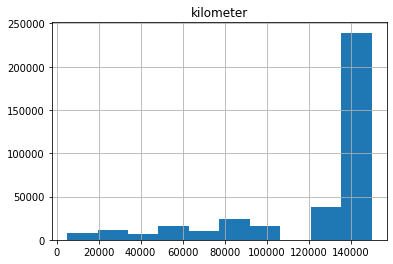

In [34]:
df.hist(["kilometer"])

Как прекрасно видно из гистограммы, никаких патологий в столбце с пробегом не наблюдается.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CACB6D9088>]],
      dtype=object)

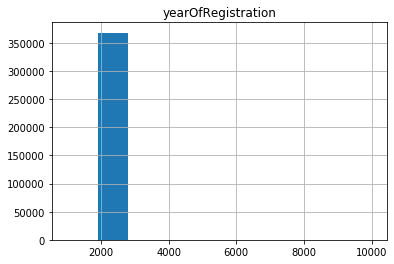

In [35]:
df.hist(["yearOfRegistration"])

А вот на данных о годе регистрации ТС картина не столь хороша. Как можно видеть из гистограммы, основной объем зарегистрированных автомобилей приходится на стык первого и второго тысячелетия, что, в целом, соответствует действительности. Что же не так? Растянутая ось абсцисс свидетельствует о том, что в нашей базе есть записи, в которых год регистрации превышает 9000 год нашей эры. Разберемся с этим более подробно.

При выводе гистограммы для временного периода с 1950-го года по 2020-ый получаем вполне закономерную картину. Автомобилей старых лет на рынке все меньше из-за банального износа, а автомобили последнего десятилетия продаются менее активно, так как автомобиль возрастом до пяти лет, в принципе, считается новым и хозяева редко решают расстаться с ним.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CACC521548>]],
      dtype=object)

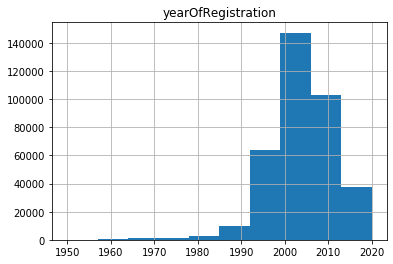

In [36]:
df.hist(["yearOfRegistration"], range = [1950, 2020])

При рассмотрении промежутка до 1950-го года получаем, что кто-то продает автомобили, произведенные в начале второго тысячелетия. Конечно, может быть это какие-то экипажи, мощностью в 6 лошадиных сил или колесницы в 2 л.с., но, в рамках данной работы, их стоит исключить, так как даже в рамках пика около 1950 объем этих объявлений не превышает 200.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAC10587C8>]],
      dtype=object)

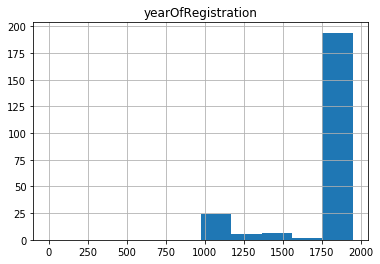

In [37]:
df.hist(["yearOfRegistration"], range = [0, 1950])

Так же стоит избавиться от ~100 объявлений о продаже путешественников во времени, прибывших к нам из далекого и не очень будущего.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CACD349CC8>]],
      dtype=object)

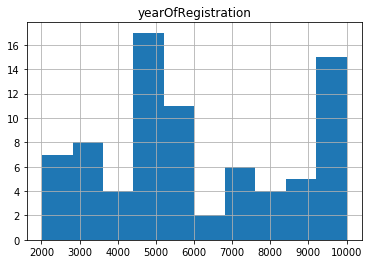

In [38]:
df.hist(["yearOfRegistration"], range = [2020, 10000])

In [39]:
df= df[(df['yearOfRegistration'] < 2020) & (df['yearOfRegistration'] > 1950)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CACB1EE648>]],
      dtype=object)

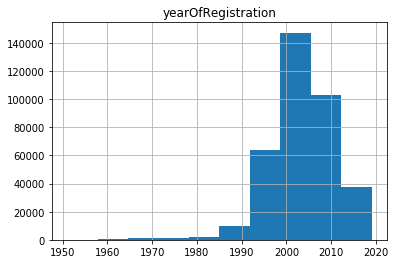

In [40]:
df.hist(["yearOfRegistration"])

На этом работу со столбцом с годом регистрации можно завершить.

В рамках рассмотрения столбца с мощностью двигателя продаваемого ТС получаем уже знакомую картину.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CACB1E9EC8>]],
      dtype=object)

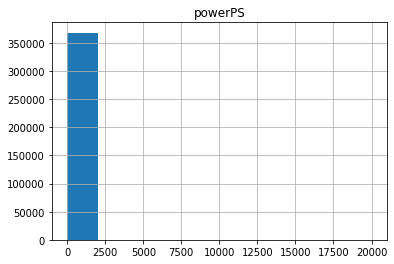

In [41]:
df.hist(["powerPS"])

Исходя из предположения, что рассматривать объявления о продаже машин со снятым двигателем, имеющих 0 лошадиных сил, и о продаже танков, самолетов и кораблей с силовыми установками более 2000 л.с., мы не будем, удаляем записи из данного диапазона.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CACCE637C8>]],
      dtype=object)

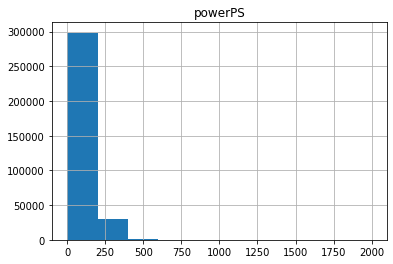

In [42]:
df = df[(df['powerPS'] < 2000) & ~(df['powerPS'] == 0)]
df.hist(["powerPS"])

Далее следует сомнительный, даже с моей точки зрения, шаг. Но, учитывая общий объем объявлений с мощностью в диапазоне от 600 до 2000 л.с. от них тоже можно избавиться. Вызвано это особенностями обработки информации с помощью нейронных сетей, с чем мы столкнемся в дальнейшем.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAC16E8A48>]],
      dtype=object)

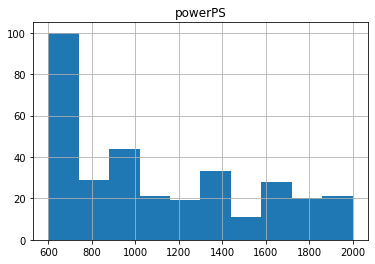

In [43]:
df.hist(["powerPS"], range = [600, 2000])

In [44]:
len(df.index)

329983

In [45]:
df = df[df['powerPS'] < 600]

In [46]:
len(df.index)

329657

Итого, в результате нашей предварительной обработки данных мы получили базу с общим объемом записей около 330 тысяч. Таким образом, удалению подверглось около сорока тысяч записей, что в процентном выражении составляет около 11% от общего объема базы.  

## Подготовка набора данных (Практическая часть)

Самостоятельно проведите подобную начальную обработку с датасетом, содержащим информацию о продаже недвижимости в Нью-Йорке.

https://www.kaggle.com/new-york-city/nyc-property-sales

- **Unnamed: 0** - *Непонятно*
- BOROUGH - *Название района, в котором расположена недвижимость*
- NEIGHBORHOOD - *Соседство*
- BUILDING CLASS CATEGORY - *Категория класса здания*
- TAX CLASS AT PRESENT - *Налоговый класс в настоящее время*  
- BLOCK - *подразделение района, на территории которого расположена недвижимость*
- LOT - *уникальное местоположение недвижимости*
- **EASE-MENT** - *???*
- BUILDING CLASS AT PRESENT - *Класс здания*
- **ADDRESS** - *Адресс*
- **APARTMENT NUMBER** - *Номер апартаментов*
- **ZIP CODE** - *Почтовый индекс*
- RESIDENTIAL UNITS - *Количество жилых единиц в указанном объекте недвижимости*
- COMMERCIAL UNITS - *Количество комерческих единиц в указанном объекте недвижимости.*
- **TOTAL UNITS** - *Общее количество единиц на указанном объекте*
- LAND SQUARE FEET - *Площадь земельного участка, указанная в квадратных футах*
- GROSS SQUARE FEET - *Общая площадь всех этажей здания, включая площадь земли и пространство внутри любого здания на участке.*
- YEAR BUILT - *Год постройки*
- **TAX CLASS AT TIME OF SALE** - *Класс налогов*
- **BUILDING CLASS AT TIME OF SALE** - *Класс здания на момент продажи*
- SALE PRICE - *Цена продажи*
- **SALE DATE** - *Дата продажи*

In [47]:
%%capture
!wget https://www.dropbox.com/s/0un1sdvifenp2ir/nyc-rolling-sales.csv

In [48]:
data = pd.read_csv('nyc-rolling-sales.csv')

In [49]:
data.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

#### Количество уникальных значений в каждом столбце

In [51]:
columns = data.columns

print('Количество уникальных значений в каждом столбце:\n')
for column in columns:
    print('{:<33} {:>6}'.format(column, len(data[column].unique())))

Количество уникальных значений в каждом столбце:

Unnamed: 0                         26736
BOROUGH                                5
NEIGHBORHOOD                         254
BUILDING CLASS CATEGORY               47
TAX CLASS AT PRESENT                  11
BLOCK                              11566
LOT                                 2627
EASE-MENT                              1
BUILDING CLASS AT PRESENT            167
ADDRESS                            67563
APARTMENT NUMBER                    3989
ZIP CODE                             186
RESIDENTIAL UNITS                    176
COMMERCIAL UNITS                      55
TOTAL UNITS                          192
LAND SQUARE FEET                    6062
GROSS SQUARE FEET                   5691
YEAR BUILT                           158
TAX CLASS AT TIME OF SALE              4
BUILDING CLASS AT TIME OF SALE       166
SALE PRICE                         10008
SALE DATE                            364


Столбцы "Unnamed: 0", "EASE-MENT", "ADDRESS", "APARTMENT NUMBER", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE DATE" не несут практической пользы.

In [52]:
data = pd.read_csv('nyc-rolling-sales.csv')

data = data.drop(['Unnamed: 0',
                  'EASE-MENT',
                  'ADDRESS',
                  'APARTMENT NUMBER',
                  'TAX CLASS AT TIME OF SALE',
                  'BUILDING CLASS AT TIME OF SALE',
                  'SALE DATE'], axis=1)

Столбец "TOTAL UNITS" - комбинация столбцов "RESIDENTIAL UNITS" и "COMMERCIAL UNITS". Следовательно его тоже можно удалить:

In [53]:
data = data.drop(['TOTAL UNITS'], axis=1)

Столбец "ZIP CODE" также является избыточным, т.к. установить адресс можно по комбинации признаков "BOROUG", "BLOCK" и "LOT":

In [54]:
data = data.drop(["ZIP CODE"], axis=1)

In [55]:
columns = data.columns

print('Количество уникальных значений в каждом столбце:\n')
for column in columns:
    print('{:<33} {:>6}'.format(column, len(data[column].unique())))

Количество уникальных значений в каждом столбце:

BOROUGH                                5
NEIGHBORHOOD                         254
BUILDING CLASS CATEGORY               47
TAX CLASS AT PRESENT                  11
BLOCK                              11566
LOT                                 2627
BUILDING CLASS AT PRESENT            167
RESIDENTIAL UNITS                    176
COMMERCIAL UNITS                      55
LAND SQUARE FEET                    6062
GROSS SQUARE FEET                   5691
YEAR BUILT                           158
SALE PRICE                         10008


#### Столбцы с нулевыми элементами

In [56]:
data.isnull().any()

BOROUGH                      False
NEIGHBORHOOD                 False
BUILDING CLASS CATEGORY      False
TAX CLASS AT PRESENT         False
BLOCK                        False
LOT                          False
BUILDING CLASS AT PRESENT    False
RESIDENTIAL UNITS            False
COMMERCIAL UNITS             False
LAND SQUARE FEET             False
GROSS SQUARE FEET            False
YEAR BUILT                   False
SALE PRICE                   False
dtype: bool

Исключим из датасета недвижимость с нудевой ценой продажи ('-').

In [57]:
len_before = data.shape[0]

data = data.drop(data[data['SALE PRICE'] == ' -  '].index)

len_after = data.shape[0]

print('Было объектов:  ', len_before)
print('Стало объектов: ', len_after)
print('Удалилось {}% выборки'.format(round((1 - len_after/len_before)*100, 2)))

Было объектов:   84548
Стало объектов:  69987
Удалилось 17.22% выборки


##### BOROUGH

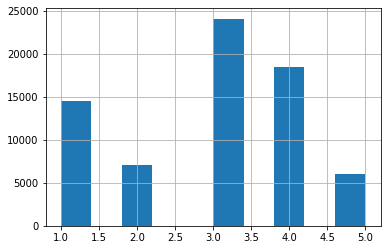

In [58]:
data['BOROUGH'].hist()

##### TAX CLASS AT PRESENT

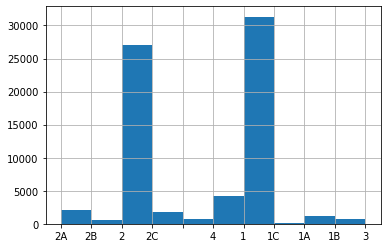

In [60]:
data['TAX CLASS AT PRESENT'].hist()

##### BLOCK

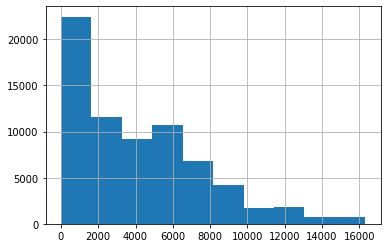

In [61]:
data['BLOCK'].hist()

#### LOT

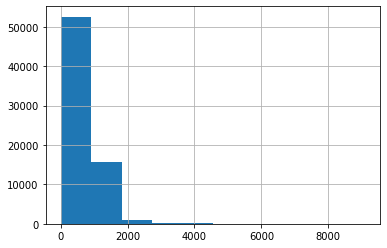

In [62]:
data['LOT'].hist()

##### YEAR BUILT

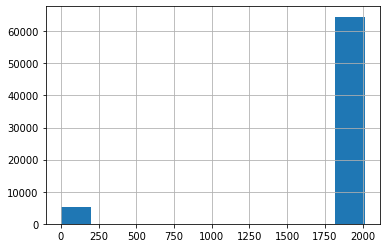

In [71]:
data['YEAR BUILT'].hist()

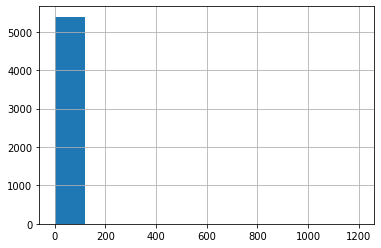

In [72]:
data['YEAR BUILT'].hist(range=(0, 1200))

Много объектов с "нулевым" годом постройки

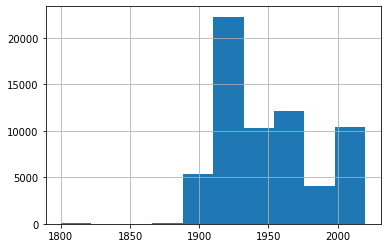

In [73]:
data['YEAR BUILT'].hist(range=(1800, 2020))

In [74]:
len_before = data.shape[0]

data = data.drop(data[data['YEAR BUILT'] < 1800].index)

len_after = data.shape[0]

print('Было объектов:  ', len_before)
print('Стало объектов: ', len_after)
print('Удалилось {}% выборки'.format(round((1 - len_after/len_before)*100, 2)))

Было объектов:   69987
Стало объектов:  64595
Удалилось 7.7% выборки


#### Вывод

In [82]:
print('В итоге выборка сократилась на', round((1 - 64595 / 84548 ) * 100, 2), '%')

В итоге выборка сократилась на 23.6 %
